## Dependencies

In [5]:
import matplotlib.pyplot as plt
import networkx as nx # for graph creation
import time # for timing

In [58]:
# # make cycle graph
# def make_cycle_graph(n):
#     G = nx.cycle_graph(n)
#     return G

# # make complete graph
# def make_complete_graph(n):
#     G = nx.complete_graph(n)
#     return G
import random

def make_cycle_graph(n, extra_edges=0):
    G = nx.cycle_graph(n)
    for _ in range(extra_edges):
        u, v = random.sample(G.nodes, 3)
        G.add_edge(u, v)
    return G

def make_complete_graph(n, extra_edges=0):
    G = nx.complete_graph(n)
    for _ in range(extra_edges):
        u, v = random.sample(G.nodes, 3)
        G.add_edge(u, v)
    return G


In [59]:
# create cycle and complete 
cycle_graph = make_cycle_graph(20)
complete_graph = make_complete_graph(20)

Text(0.5, 1.0, 'Complete Graph')

<Figure size 640x480 with 0 Axes>

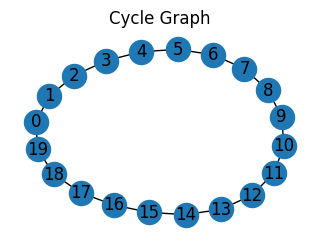

<Figure size 640x480 with 0 Axes>

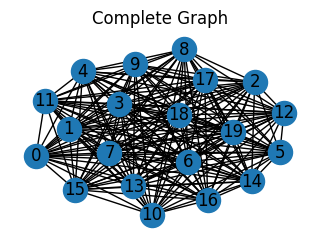

In [60]:
# plot cycle graph
plt.figure()
# set size
plt.figure(figsize=(3,2))
nx.draw(cycle_graph, with_labels=True)
plt.title('Cycle Graph')

# plot complete graph
plt.figure()
# set size
plt.figure(figsize=(3,2))
nx.draw(complete_graph, with_labels=True)
plt.title('Complete Graph')


## Brute Force

## Back Tracking

Cycle Graph:
Solution Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> 15 -> 16 -> 17 -> 18 -> 19 -> 20 -> 21 -> 22 -> 23 -> 24 -> 25 -> 26 -> 27 -> 28 -> 29 -> 30 -> 31 -> 32 -> 33 -> 34 -> 35 -> 36 -> 37 -> 38 -> 39 -> 40 -> 41 -> 42 -> 43 -> 44 -> 45 -> 46 -> 47 -> 48 -> 49 -> 50 -> 51 -> 52 -> 53 -> 54 -> 55 -> 56 -> 57 -> 58 -> 59 -> 60 -> 61 -> 62 -> 63 -> 64 -> 65 -> 66 -> 67 -> 68 -> 69 -> 70 -> 71 -> 72 -> 73 -> 74 -> 75 -> 76 -> 77 -> 78 -> 79 -> 80 -> 81 -> 82 -> 83 -> 84 -> 85 -> 86 -> 87 -> 88 -> 89 -> 90 -> 91 -> 92 -> 93 -> 94 -> 95 -> 96 -> 97 -> 98 -> 99 -> 0


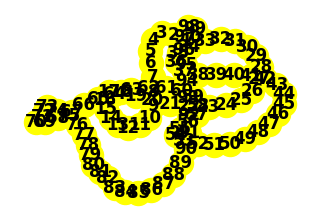

Complete Graph:
Solution Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> 15 -> 16 -> 17 -> 18 -> 19 -> 20 -> 21 -> 22 -> 23 -> 24 -> 25 -> 26 -> 27 -> 28 -> 29 -> 30 -> 31 -> 32 -> 33 -> 34 -> 35 -> 36 -> 37 -> 38 -> 39 -> 40 -> 41 -> 42 -> 43 -> 44 -> 45 -> 46 -> 47 -> 48 -> 49 -> 50 -> 51 -> 52 -> 53 -> 54 -> 55 -> 56 -> 57 -> 58 -> 59 -> 60 -> 61 -> 62 -> 63 -> 64 -> 65 -> 66 -> 67 -> 68 -> 69 -> 70 -> 71 -> 72 -> 73 -> 74 -> 75 -> 76 -> 77 -> 78 -> 79 -> 80 -> 81 -> 82 -> 83 -> 84 -> 85 -> 86 -> 87 -> 88 -> 89 -> 90 -> 91 -> 92 -> 93 -> 94 -> 95 -> 96 -> 97 -> 98 -> 99 -> 0


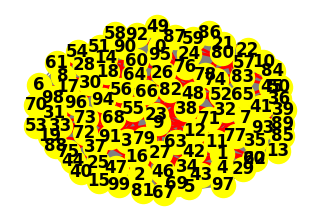

True

In [61]:
# Code referred from GeeksforGeeks - https://www.geeksforgeeks.org/hamiltonian-cycle/
class Graph():
    def __init__(self, vertices):
        # Initialize the graph as an adjacency matrix with all with 0's
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]
        self.V = vertices  # Set the number of vertices

    def add_edge(self, u, v):
        # Add an undirected edge between u and v
        self.graph[u][v] = 1
        self.graph[v][u] = 1

    def isSafe(self, v, pos, path):
        # Check if current vertex and last vertex in path are adjacent
        if self.graph[path[pos-1]][v] == 0:
            return False
        # Check if current vertex not already in path
        for vertex in path:
            if vertex == v:
                return False
        return True

   	# A recursive function to solve hamiltonian cycle problem 
    def hamCycleUtil(self, path, pos):
        # Base case: if all vertices are included in the path
        if pos == self.V:
            # Last vertex must be adjacent to the first vertex in path to make a cycle
            if self.graph[path[pos-1]][path[0]] == 1:
                return True
            else:
                return False
        # Explore all vertices other than the first vertex
        for v in range(1, self.V):
            if self.isSafe(v, pos, path):
                path[pos] = v
                if self.hamCycleUtil(path, pos+1):
                    return True
                # DeadEnd - Remove current vertex if it doesn't lead to a solution
                path[pos] = -1
        return False

    def hamCycle(self):
        # Initialize path as -1
        path = [-1] * self.V
        # Start from vertex 0 as the first vertex in the path
        path[0] = 0
        # Call the recursive helper function to find Hamiltonian cycle
        if not self.hamCycleUtil(path, 1):
            print("Solution does not exist\n")
            self.plot_graph()
            return False
        self.printSolution(path)
        self.plot_graph(path)
        return True

    def printSolution(self, path):
        print("Solution Exists: Following is one Hamiltonian Cycle")
        for vertex in path:
            print(vertex, end=' -> ')
        print(path[0])  # Print the first vertex again to show the complete cycle

    def plot_graph(self, path=None):
        G = nx.Graph()
        for i in range(self.V):
            for j in range(i, self.V):
                if self.graph[i][j] == 1:
                    G.add_edge(i, j)
        pos = nx.spring_layout(G)
        plt.figure(figsize=(3, 2))
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='yellow', edge_color='gray')
        if path:
            edges_in_path = [(path[i], path[(i + 1) % self.V]) for i in range(self.V)]
            nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=2)
        plt.show()

# graph used in report
# g1 = Graph(5) 
# g1.add_edge(0, 1)
# g1.add_edge(0, 3)
# g1.add_edge(1, 2)
# g1.add_edge(1, 3)
# g1.add_edge(1, 4)
# g1.add_edge(2, 4)
# g1.add_edge(3, 4)
# g1.hamCycle()

# g2 = Graph(5) 
# g2.add_edge(0, 1)
# g2.add_edge(0, 3)
# g2.add_edge(1, 2)
# g2.add_edge(1, 3)
# g2.add_edge(1, 4)
# g2.add_edge(2, 4)
# g2.add_edge(3, 4)
# g2.add_edge(0, 2)
# g2.hamCycle()

# Create cycle and complete graphs
cycle_graph = make_cycle_graph(100)
complete_graph = make_complete_graph(100)

# Instantiate Graph class and analyze
cycle_graph_instance = Graph(100)  # Assuming 10 vertices for the cycle graph
complete_graph_instance = Graph(100)  # Assuming 10 vertices for the complete graph

# Add edges to the graph instances based on the generated graphs
for edge in cycle_graph.edges():
    cycle_graph_instance.add_edge(edge[0], edge[1])

for edge in complete_graph.edges():
    complete_graph_instance.add_edge(edge[0], edge[1])

# Analyze cycle graph
print("Cycle Graph:")
cycle_graph_instance.hamCycle()

# Analyze complete graph
print("Complete Graph:")
complete_graph_instance.hamCycle()


## Dynamic Programming